In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_skill_lists = df[['job_title_short', 'job_skills']]
df_skill_lists

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."
...,...,...
785736,Software Engineer,"[bash, python, perl, linux, unix, kubernetes, ..."
785737,Data Analyst,"[sas, sas, sql, excel]"
785738,Business Analyst,"[powerpoint, excel]"
785739,Data Engineer,"[python, go, nosql, sql, mongo, shell, mysql, ..."


In [3]:
df_skill_lists.explode('job_skills').value_counts('job_skills')

job_skills
sql             384849
python          380909
aws             145381
azure           132527
r               130892
                 ...  
dingtalk             1
rocketchat           1
rubyon rails         1
wimi                 1
msaccess             1
Name: count, Length: 252, dtype: int64

In [4]:
df_exploded = df.explode('job_skills')

df_exploded



,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [5]:
# df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [6]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()



In [7]:
df_skills_count = skills_count.reset_index(name='skill_count')

df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)

df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


<function matplotlib.pyplot.show(close=None, block=None)>

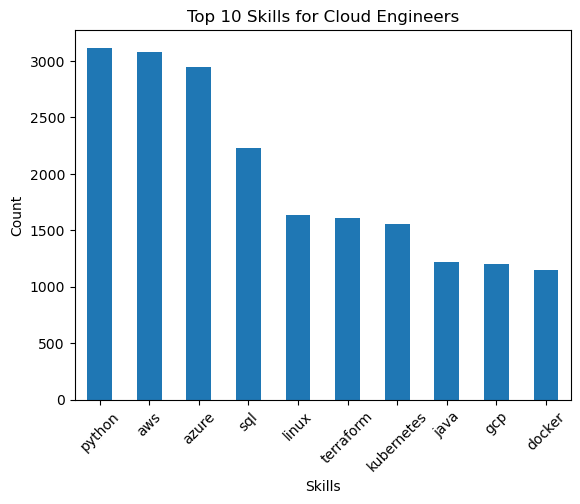

In [8]:
job_title = 'Cloud Engineer' #aqui puedes cambiar el nombre al job_title_short que quieras y te lo mostrará. Y abajo el numero de skills que quieres que te muestre.
top_skills = 10

df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skills_final.plot(kind='bar', x='job_skills', y='skill_count')
#plt.gca().invert_yaxis() #para invertir las Axes y que te quede en forma descendente.
plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend().set_visible(False)
plt.show



# usaste la misma del video cambiandole los valores nada más. Pero basicamente debes hacer todo lo que está en esta pestaña de código.

In [9]:
df_exploded = df.explode('job_skills')

#salary_skills_avg = df_exploded.groupby(['salary_year_avg', 'job_skills']).size()
#salary_skills_avg.head()

skill_salary_avg = df_exploded.groupby('job_skills')['salary_year_avg'].mean().reset_index()
skill_salary_avg = skill_salary_avg.sort_values(by='salary_year_avg', ascending=False).head()
skill_salary_avg

#Solucion de luke   

,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526


In [10]:
df_exploded = df.explode('job_skills')

num_unique_skills = df_exploded.groupby('job_skills').nunique()
num_unique_skills = num_unique_skills.sort_values(by='salary_year_avg', ascending=False).head()
num_unique_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_type_skills
job_skills,,,,,,,,,,,,,,,,
sql,10,107369,11079,5285,35,2,167,334878,2,2,157,5,1745,733,79838,110823
python,10,105561,10675,5169,37,2,166,330015,2,2,155,5,1673,656,76744,116579
r,10,38769,6447,3004,32,2,154,122263,2,2,146,4,1105,409,34646,34772
tableau,10,38952,5964,2959,30,2,157,119748,2,2,150,5,979,446,34584,37499
excel,10,44444,7024,2994,36,2,161,115839,2,2,154,5,885,464,39554,28914


In [11]:

df_exploded = df.explode('job_skills')

# Group by 'job_title_short' and count unique skills
unique_skills_count = df_exploded.groupby('job_title_short')['job_skills'].nunique().reset_index()
unique_skills_count.columns = ['job_title_short', 'num_unique_skills']
unique_skills_count.head()

#luke

,job_title_short,num_unique_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237
